In [6]:
# Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/netflix-datasets/Best Movie by Year Netflix.csv')

# Preview the dataset
df.head()




,index,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
0,0,White Christmas,1954,7.5,romance,US
1,1,The Guns of Navarone,1961,7.5,war,US
2,2,My Fair Lady,1964,7.8,drama,US
3,3,Bonnie and Clyde,1967,7.7,drama,US
4,4,Dirty Harry,1971,7.7,thriller,US


In [9]:
# Clean the Data
# Step 1: Drop rows where 'SCORE' is missing and make a new copy
df_clean = df.dropna(subset=['SCORE']).copy()

# Step 2: Fill missing values in 'MAIN_PRODUCTION' column
df_clean['MAIN_PRODUCTION'] = df_clean['MAIN_PRODUCTION'].fillna('Unknown')

# Step 3: Convert 'RELEASE_YEAR' to integer (if it's not already)
df_clean['RELEASE_YEAR'] = df_clean['RELEASE_YEAR'].astype(int)

# Optional: Reset index for cleanliness
df_clean.reset_index(drop=True, inplace=True)

# Step 4: Check the cleaned dataset
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            49 non-null     int64  
 1   TITLE            49 non-null     object 
 2   RELEASE_YEAR     49 non-null     int64  
 3   SCORE            49 non-null     float64
 4   MAIN_GENRE       49 non-null     object 
 5   MAIN_PRODUCTION  49 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ KB


,index,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
0,0,White Christmas,1954,7.5,romance,US
1,1,The Guns of Navarone,1961,7.5,war,US
2,2,My Fair Lady,1964,7.8,drama,US
3,3,Bonnie and Clyde,1967,7.7,drama,US
4,4,Dirty Harry,1971,7.7,thriller,US


#  Plan Your Visualizations

What is the distribution of IMDB scores?

Which genre is most common?

How do scores trend over time?

Which production companies appear most frequently?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


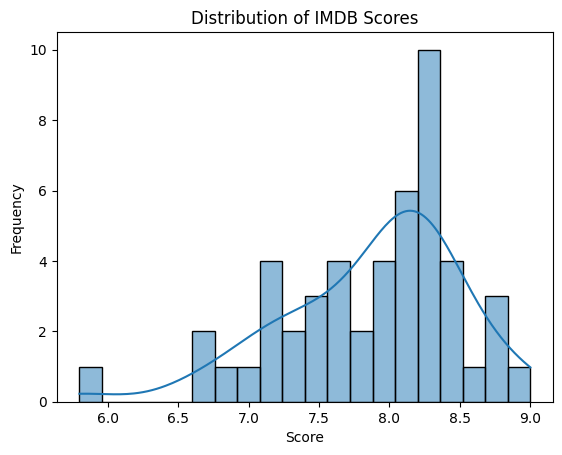

In [10]:
# Create Visualizations 
# 1. Distribution of IMDB Scores
sns.histplot(df_clean['SCORE'], kde=True, bins=20)
plt.title('Distribution of IMDB Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


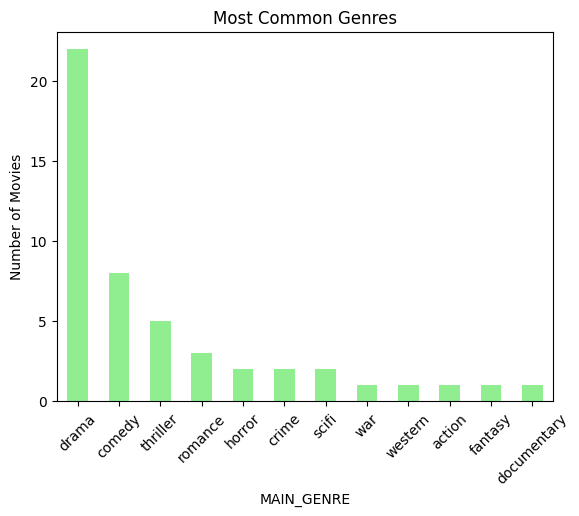

In [11]:
# 2.Top Genres
df_clean['MAIN_GENRE'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Most Common Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


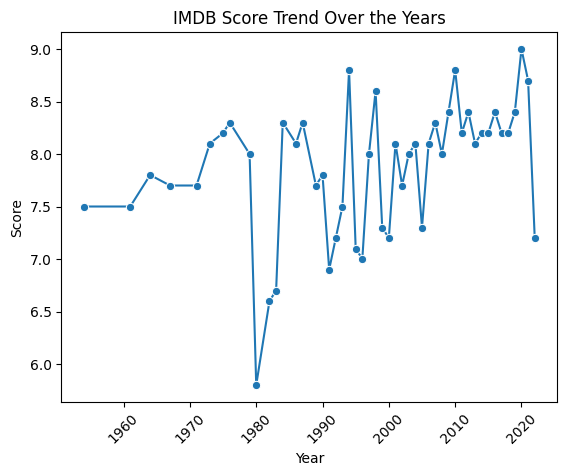

In [12]:
# 📈 3. Score Trend Over the Years
sns.lineplot(x='RELEASE_YEAR', y='SCORE', data=df_clean, marker='o')
plt.title('IMDB Score Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


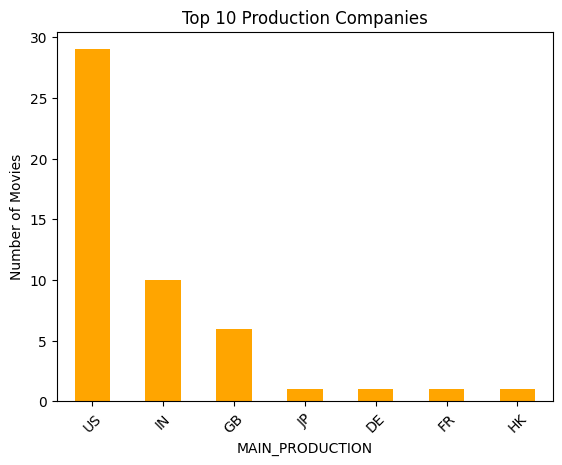

In [13]:
# 4. Top 10 Production Companies
top_producers = df_clean['MAIN_PRODUCTION'].value_counts().head(10)
top_producers.plot(kind='bar', color='orange')
plt.title('Top 10 Production Companies')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


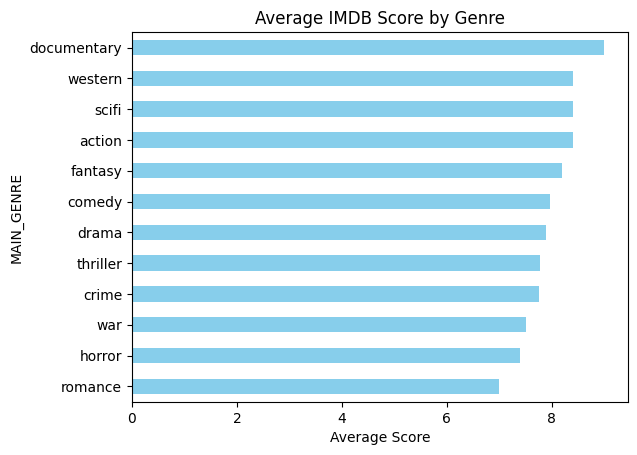

In [15]:
# 5. Average Score by Genre
df_clean.groupby('MAIN_GENRE')['SCORE'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average IMDB Score by Genre')
plt.xlabel('Average Score')
plt.show()
